## SMOTE(Synthetic Minority Oversampling Technique)
> SMOTE stands for Synthetic Minority Oversampling Technique. It's a technique used in machine learning to address a common issue called class imbalance.

> Imagine you're training a model to identify fraudulent transactions. Ideally, you'd have a dataset with a balanced number of real transactions and fraudulent ones. But in reality, fraudulent transactions are much rarer. This imbalance can lead to a machine learning model that performs poorly at detecting fraud.

> SMOTE tackles class imbalance by creating synthetic data points for the minority class (e.g., fraudulent transactions). It does this by analyzing existing data points in the minority class and creating new ones that are similar, but not identical. This helps to balance out the dataset and improve the model's ability to classify the minority class.

In [5]:
from sklearn.datasets import make_classification

In [10]:
## x indenpendent features
## y dependent features
x,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [17]:
import pandas as pd
df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)

In [19]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [20]:
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

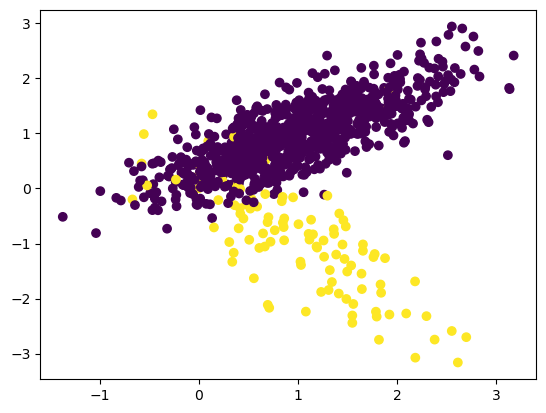

In [24]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [25]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 8.0 MB/s eta 0:00:00


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
## trannsform the dataset
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [29]:
x.shape

(1788, 2)

In [30]:
y.shape

(1788,)

In [32]:
len(y[y==0])

894

In [33]:
len(y[y==1])

894

In [35]:
df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1)

In [36]:
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.804848,1.452304,1
1784,1.060949,-0.745588,1
1785,0.655757,-1.034002,1
1786,0.704938,-2.152538,1


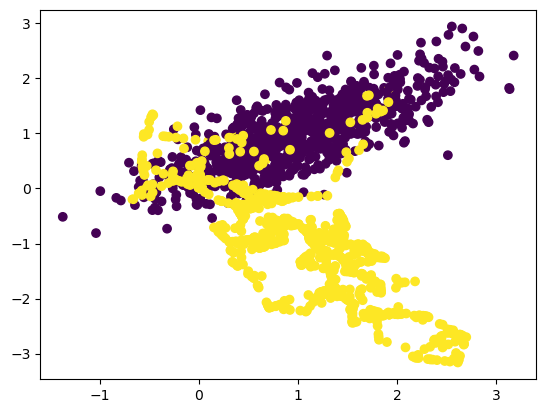

In [37]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])